# Ejemplo de Newton-Raphson multivariable

## El problema en cuestión
Se quiere tiene el siguiente polinomio de quinto grado $p(x)=a_{0}+a_{1}x^{1}+a_{2}x^{2}+\dots a_{5}x^{5}$. El desafío está en encontrar el valor de los coeficientes $a_{0},a_{1},a_{2},\dots,a_{5}$ que mejor aproximen $p(x)$ a la función $\sin(x)$ en el intervalo de $x\in[-3,3]$.

### Función de costo
Esta situación puede plantearse como una función de costo, cuyos parámetros son los coeficientes de $p(x)$ a encontrar. Una de las formas por medio de las cuales podemos aproximar lo mejor posible $p(x)$ a $\sin(x)$ es tratando de minimizar el error cuadrático medio, es decir, utilizando [[mínimos cuadrados]]. De esta forma tendríamos la siguiente función de costo:

$$\theta(a_{0},a_{1},a_{2},\dots,a_{5})=\int_{-3}^{3} (p(x)-\sin(x))^{2}\, dx$$

Esta sería la función de costo a minimizar por medio del [[descenso de gradiente]], por medio de la cual realizaremos una estimación inicial de un valor $\underline{a}$ y se ajustará el valor por medio de la siguiente fórmula iterativa:

$$\underline{a}_{n+1}=\underline{a}_{n}-\alpha \nabla\theta(\underline{a}_{n})$$

### Iteración de Newton-Raphson con matriz Hessiana

Para minimizar la función de coste, se tiene la siguiente fórmula iterativa:
$$ \omega_{n+1} = \omega_{n}-H(\omega_{n})^{-1}\cdot \nabla\theta(\omega_{n})$$

Entonces, para poder trabajar con este método se necesita la inversa de la matriz Hessiana de la función de coste evaluada en el punto $\omega_{n}$ y el gradiente, también evaluado en $\omega_{n}$.

### Gradiente de la función de costo

Para obtener el gradiente de la función de costo, nos apoyaremos de la notación sigma de $p(x)$.

$$\theta(a_{0},a_{1},a_{2},\dots,a_{5})=\int_{-3}^{3}\left( \sum^{ 5 }_{ k = 0 }a_{k}x^{k} -\sin(x) \right)^{2}\, dx$$

Derivamos $\theta$ en función de los coeficientes del polinomio $p(x)$, que sería derivar $\theta$ en función de cada $a_{j}$:

$$\frac{ \partial \theta }{ \partial a_{i} } = \frac{ \partial  }{ \partial a_{i} } \int_{-3}^{3}\left( \sum^{ 5 }_{ k = 0 }a_{k}x^{k}-\sin(x) \right)^{2}\, dx =\int_{-3}^{3}\frac{ \partial  }{ \partial a_{i} } \left( \sum^{ 5 }_{ k = 0 }a_{k}x^{k}-\sin(x) \right)^{2}\, dx $$
El intercambio del orden de diferenciación e integración es posible gracias el [[Teorema de Leibniz]] para diferenciar integrales con parámetros. Por lo tanto, se tiene que:
$$\frac{ \partial \theta }{ \partial a_{i} } = 2\int_{-3}^{3} x^{i}\,  (p(x)-\sin(x))^{2}\, dx $$
El gradiente entonces tiene la forma:
$$\nabla\theta=2\begin{bmatrix}
\int_{-3}^{3} x^{0}\, (p(x)-\sin(x))^{2} \, dx  \\
\int_{-3}^{3} x^{1}\, (p(x)-\sin(x))^{2} \, dx  \\
\int_{-3}^{3} x^{2}\, (p(x)-\sin(x))^{2} \, dx \\
\vdots \\
\int_{-3}^{3} x^{5}\, (p(x)-\sin(x))^{2} \, dx
\end{bmatrix}$$

Calcular el gradiente de forma analítica puede resultar muy complicado, pues es el producto de dos funciones que tiene que integrarse, por lo que se recurre a métodos numéricos para aproximar el valor de los componentes del gradiente.

### Matriz Hessiana de la función de costo
El gradiente se obtuvo encontrando que:
$$
\frac{ \partial \theta }{ \partial a_{i} } =2\int_{-3}^{3} x^{i}(p(x)-\sin(x))\, dx
$$
Dado que la matriz Hessiana deriva la primera derivada parcial con respecto a todas las variables por segunda vez, solo queda calcular esta nueva expresión:
$$
\frac{ \partial  }{ \partial a_{j} } \frac{ \partial \theta }{ \partial a_{i} } =\frac{\partial^{2} \theta}{\partial a_{i} \partial a_{j}}=\frac{ \partial }{ \partial a_{j} } 2\int_{-3}^{3} x^{i}(p(x)-\sin(x))\, dx 
$$
Nuevamente, utilizando el [[Teorema de Leibniz]]:
$$
\frac{\partial^{2} \theta}{\partial a_{i} \partial a_{j}}=2\int_{-3}^{3}\left[ \frac{ \partial }{ \partial a_{j} } x^{i}(p(x)-\sin(x)) \right]\, dx =2\int_{-3}^{3}x^{i}x^{j}\, dx 
$$
Entonces, los términos de la matriz Hessiana son descritos por el siguiente término general:
$$
H_{ij}=2\int_{-3}^{3} x^{i+j} \, dx 
$$
Evaluar para los coeficientes desde $a_{0}$ hasta $a_{5}$ devuelve la siguiente matriz Hessiana:
$$H=
\begin{bmatrix}
12 & 0 & 36 & 0 & \frac{972}{5} & 0 \\
0 & 36 & 0 & \frac{972}{5} & 0 & \frac{8748}{7} \\
36 & 0 & \frac{972}{5} & 0 & \frac{8748}{7} & 0 \\
0 & \frac{972}{5} & 0 & \frac{8748}{7} & 0 & 8748 \\
\frac{972}{5} & 0 & \frac{8748}{7} & 0 & 8748 & 0 \\
0 & \frac{8748}{7} & 0 & 8748 & 0 & \frac{708588}{11}
\end{bmatrix}
$$
Ahora, obteniendo la matriz inversa:
$$
H^{-1}=
\begin{bmatrix}
\frac{75}{256} & 0 & -\frac{175}{1152} & 0 & \frac{35}{2304} & 0 \\
0 & \frac{1225}{2304} & 0 & -\frac{245}{1152} & 0 & \frac{385}{20736} \\
-\frac{175}{1152} & 0 & \frac{245}{1728} & 0 & -\frac{175}{10368} & 0 \\
0 & -\frac{245}{1152} & 0 & \frac{175}{1728} & 0 & -\frac{2695}{279936} \\
\frac{35}{2304} & 0 & -\frac{175}{10368} & 0 & \frac{1225}{559872} & 0 \\
0 & \frac{358}{20736} & 0 & -\frac{2695}{279936} & 0 & \frac{539}{559872}
\end{bmatrix}
$$
Para este caso, se tuvo la suerte de que la matriz Hessiana resultó ser una matriz constante. De no serlo, tendría que evaluarse para cada término el vector $\omega_{k}$ por cada iteración, lo cual puede ser muy costoso computacionalmente.
Sin embargo, ahora hay que multiplicar $H^{-1}\cdot\nabla\theta(\omega_{k})$ por cada iteración, una operación costosa, pues es una multiplicación entre matrices.

### Condiciones de la matriz Hessiana:
1. Simetría $$ H_{ij} = H_{ji}$$
2. Positividad definida $$\forall\mathbf{\lambda}\neq 0,\quad \mathbf{\lambda}^{T}H\mathbf{\lambda} > 0 $$
3. Inversibilidad $$\exists H^{-1}$$

In [3]:
import numpy as np

H = np.array([
    [12, 0, 36, 0, 972/5, 0],
    [0, 36, 0, 972/5, 0, 8748/7],
    [36, 0, 972/5, 0, 8748/7, 0],
    [0, 972/5, 0, 8748/7, 0, 8748],
    [972/5, 0, 8748/7, 0, 8748, 0],
    [0, 8748/7, 0, 8748, 0, 708588/11]
])

print("¿Es simétrica?", np.allclose(H, H.T))
print("¿Es positiva definida?", np.all(np.linalg.eigvals(H) > 0))
print("Número de condición:", np.linalg.cond(H))
print("¿Rango completo?", np.linalg.matrix_rank(H) == H.shape[0])

¿Es simétrica? True
¿Es positiva definida? True
Número de condición: 40673.99281046367
¿Rango completo? True


Coeficientes finales:
a0 = -0.000000
a1 = 0.909014
a2 = 0.000000
a3 = -0.112251
a4 = 0.000000
a5 = 0.001128


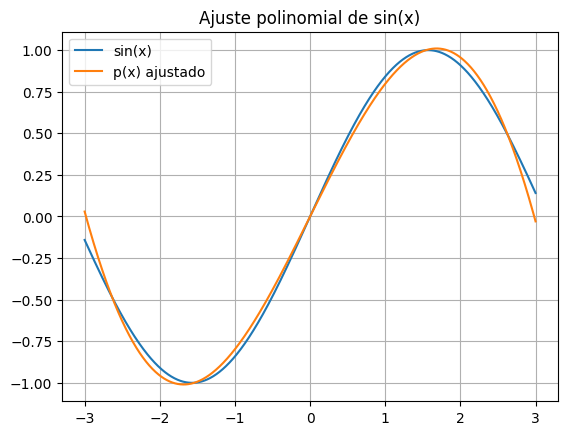

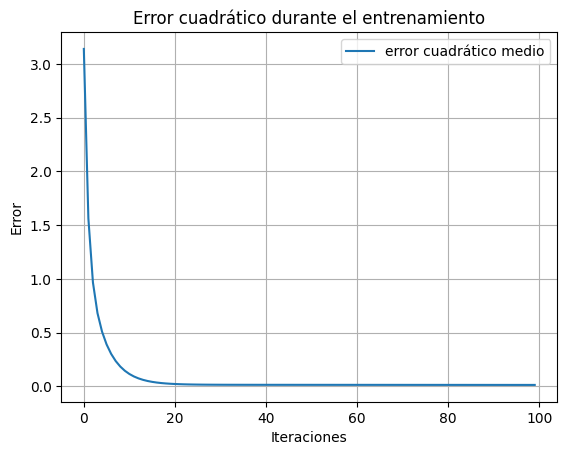

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3, 3, 1000)
dx = x[1] - x[0]

a = np.zeros(6)
target = np.sin(x)
num_iters = 100
damping = 0.06     # El amortiguamiento es porque esta cosa no converge sin esto.
powers = np.vstack([x**i for i in range(6)])
errors = []

H_inv = np.array([
    [75/358,   0,        -175/1152,  0,        35/2304,     0],
    [0,       1295/2304, 0,         -175/1728, 0,           35/10368],
    [-175/1152, 0,       245/1728,   0,       -35/20736,    0],
    [0,      -175/1728,  0,         1295/10368, 0,         -2695/279936],
    [35/2304, 0,       -35/20736,   0,        1295/559872, 0],
    [0,       35/10368,  0,        -2695/279936, 0,       439/559872]
])

for it in range(num_iters):
    px = np.dot(a, powers) 
    error = px - target
    gradient = 2 * np.dot(error, powers.T) * dx 
    a -= damping * (H_inv @ gradient)

    cost = np.sum(error**2) * dx
    errors.append(cost)

print("Coeficientes finales:")
for i, coef in enumerate(a):
    print(f"a{i} = {coef:.6f}")

plt.plot(x, target, label='sin(x)')
plt.plot(x, np.dot(a, powers), label='p(x) ajustado')
plt.legend()
plt.title("Ajuste polinomial de sin(x)")
plt.grid(True)
plt.show()

plt.plot(errors, label='error cuadrático medio')
plt.legend()
plt.title("Error cuadrático durante el entrenamiento")
plt.xlabel("Iteraciones")
plt.ylabel("Error")
plt.grid(True)
plt.show()